<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo70/blob/main/RetoFinal/Entrega2/Reto_Entrega2_Clasificaci%C3%B3nEnsamblesYPresentaci%C3%B3nEjecutiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico y de Estudios Superiores de Monterrey**

**Maestría en Inteligencia Artificial Aplicada**

# Reto -> Entrega 2 (18/11): Clasificación-ensambles y presentación ejecutiva.



---



---



Datos generales

---

Reto -> Entrega 2 (18/11): Clasificación-ensambles y presentación ejecutiva.

---

* Nombres del equipo 70:
  * Javier Pérez Sanagustín
  * Herbert Joadan Romero Villarreal

* Matrículas:
  * A01794233
  * A01794199

* Materia: Ciencia y analítica de datos (Gpo 10)

* Profesor titular: María de la Paz Rico Fernández

Profesor tutor: Bernardo Charles Canales

Fecha: 15 de noviembre del 2022

## Clasificación


---



Se eligió y se realizó la limpieza en la base de datos de:
* Aguas subterraneas.



In [ ]:
# Importamos la librería Pandas y el dataframe limpio de la entrega anterior
import pandas as pd

url_sub = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo70/main/RetoFinal/DB/df_clean_sub(1).csv'
df_sub = pd.read_csv(url_sub,encoding='cp1252')
df_sub.sample(3) # Observamos una muestra aleatoria de nuestros datos

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
363,OCNOR4228,CAMPO CORPUS,NOROESTE,SONORA,HERMOSILLO,COSTA DE HERMOSILLO,POZO,-111.64552,28.86665,156.91,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
732,OCFSU2938,MANANTIAL RIO CHILA,FRONTERA SUR,CHIAPAS,LAS ROSAS,LA TRINITARIA,POZO,-92.40592,16.36604,367.68,...,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI
960,OCGNO3583,POZO 76A RANCHO LOS NARANJOS,GOLFO NORTE,TAMAULIPAS,XICOTENCATL,LLERA-XICOTENCATL,POZO,-98.88330,23.02564,309.00,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI


### Selecciona tus variables independientes X y dependiente Y (semáforo).

In [ ]:
df_sub_w = df_sub.copy()
df_sub_w.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'ALC_mg/L', 'CALIDAD_ALC',
       'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_M_mg/L', 'CALIDAD_SDT_salin',
       'FLUORUROS_mg/L', 'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR',
       'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC', 'N_NO3_mg/L',
       'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS', 'CD_TOT_mg/L',
       'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L', 'CALIDAD_HG',
       'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN', 'FE_TOT_mg/L',
       'CALIDAD_FE', 'SEMAFORO', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='object')

In [ ]:
df_sub_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   ALC_mg/L              1068 non-null   float64
 10  CALIDAD_ALC           434 non-null    object 
 11  CONDUCT_mS/cm         1068 non-null   float64
 12  CALIDAD_CONDUC        434 non-null    object 
 13  SDT_M_mg/L            1068 non-null   float64
 14  CALIDAD_SDT_salin     434 non-null    object 
 15  FLUORUROS_mg/L       

In [ ]:
variable_drop = ['CLAVE','SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
                 'ACUIFERO', 'SUBTIPO','CALIDAD_ALC', 'CALIDAD_CONDUC',  'CALIDAD_SDT_salin',
                 'CALIDAD_FLUO', 'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3',  'CALIDAD_AS', 
                 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB',  'CALIDAD_MN', 'CALIDAD_FE' ]

df_sub_w.drop(variable_drop, inplace=True, axis=1)
df_sub_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LONGITUD              1068 non-null   float64
 1   LATITUD               1068 non-null   float64
 2   ALC_mg/L              1068 non-null   float64
 3   CONDUCT_mS/cm         1068 non-null   float64
 4   SDT_M_mg/L            1068 non-null   float64
 5   FLUORUROS_mg/L        1068 non-null   float64
 6   DUR_mg/L              1068 non-null   float64
 7   COLI_FEC_NMP/100_mL   1068 non-null   float64
 8   N_NO3_mg/L            1068 non-null   float64
 9   AS_TOT_mg/L           1068 non-null   float64
 10  CD_TOT_mg/L           1068 non-null   float64
 11  CR_TOT_mg/L           1068 non-null   float64
 12  HG_TOT_mg/L           1068 non-null   float64
 13  PB_TOT_mg/L           1068 non-null   float64
 14  MN_TOT_mg/L           1068 non-null   float64
 15  FE_TOT_mg/L          

Las variables seleccionadas son:

X : LONGITUD, LATITUD, ALC_mg/L, CONDUCT_mS/cm, SDT_M_mg/L,FLUORUROS_mg/L, DUR_mg/L,
            COLI_FEC_NMP/100_mL, N_NO3_mg/L, AS_TOT_mg/L, CD_TOT_mg/L,
            CR_TOT_mg/L, HG_TOT_mg/L,PB_TOT_mg/L, MN_TOT_mg/L, CUMPLE_CON_ALC, CUMPLE_CON_COND, CUMPLE_CON_SDT_salin, CUMPLE_CON_FLUO, 
          CUMPLE_CON_DUR, CUMPLE_CON_CF, CUMPLE_CON_NO3, CUMPLE_CON_AS,   
          CUMPLE_CON_CD, CUMPLE_CON_CR, CUMPLE_CON_HG, CUMPLE_CON_PB,       
          CUMPLE_CON_MN, CUMPLE_CON_FE]FE_TOT_mg/L

Y: SEMAFORO.

### Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [1,2,3].

Para ello, usaremos LabelEncoder que en especial sirve para variables multiclase y en este caso la variable semaforo es una de ellas.

Para otras variables independientes de tipo categoricas usaremos el OneHotEncoder.

Todo esto a través de Pipelines, para aplicar transformaciones a columnas tanto continuas como categóricas.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Para las variables continuas
cont_pipe = Pipeline(steps=[('escalaNormal', StandardScaler())])
col_cont = ['LONGITUD', 'LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L','FLUORUROS_mg/L', 'DUR_mg/L',
            'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
            'CR_TOT_mg/L', 'HG_TOT_mg/L','PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

# Para las variables categoricas binarias
cat_bin = Pipeline(steps= [('bin', OneHotEncoder())])
cat_bin_col = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 
          'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS',   
          'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB',       
          'CUMPLE_CON_MN', 'CUMPLE_CON_FE']

transform_columns = ColumnTransformer(transformers=[
                                        ('var_cont', cont_pipe, col_cont),
                                        ('var_bin', cat_bin, cat_bin_col)])

### Realiza un análisis general de las features importances a traves de decision trees o random forest.

Obtenemos las feature importances de nuestro conjunto de datos de entrenamiento usando un RandomForestClassifier y procedemos a graficar el resultado en barras horizontales de mayor a menor importancia.

Las variables dependientes de tipo binarias al pasar por el OneHotEnconder se separan en 2 columnas.

In [ ]:
# Realizamos particiones
X = df_sub_w.drop('SEMAFORO', axis=1)

le = LabelEncoder()
y = le.fit_transform(df_sub_w['SEMAFORO'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 42)

pipe_d = Pipeline(steps=[('variables', transform_columns),
                       ('modelo', RandomForestClassifier(random_state= 42))])

pipe_d.fit(X_train, y_train)

pipe_d[1][1].feature_importances_

array([1.77925935e-02, 0.00000000e+00, 1.29545373e-02, 1.37104548e-02,
       0.00000000e+00, 4.38146178e-02, 1.69192233e-01, 0.00000000e+00,
       1.49881626e-01, 0.00000000e+00, 0.00000000e+00, 2.56714141e-03,
       0.00000000e+00, 1.59868404e-02, 8.78068320e-02, 4.83123489e-02,
       0.00000000e+00, 1.13776104e-02, 2.02486579e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.46269648e-01, 0.00000000e+00,
       0.00000000e+00, 1.25502137e-02, 5.42004318e-02, 3.10974787e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.26977138e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.57922672e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.41266029e-03, 5.46694916e-05])

<BarContainer object of 44 artists>

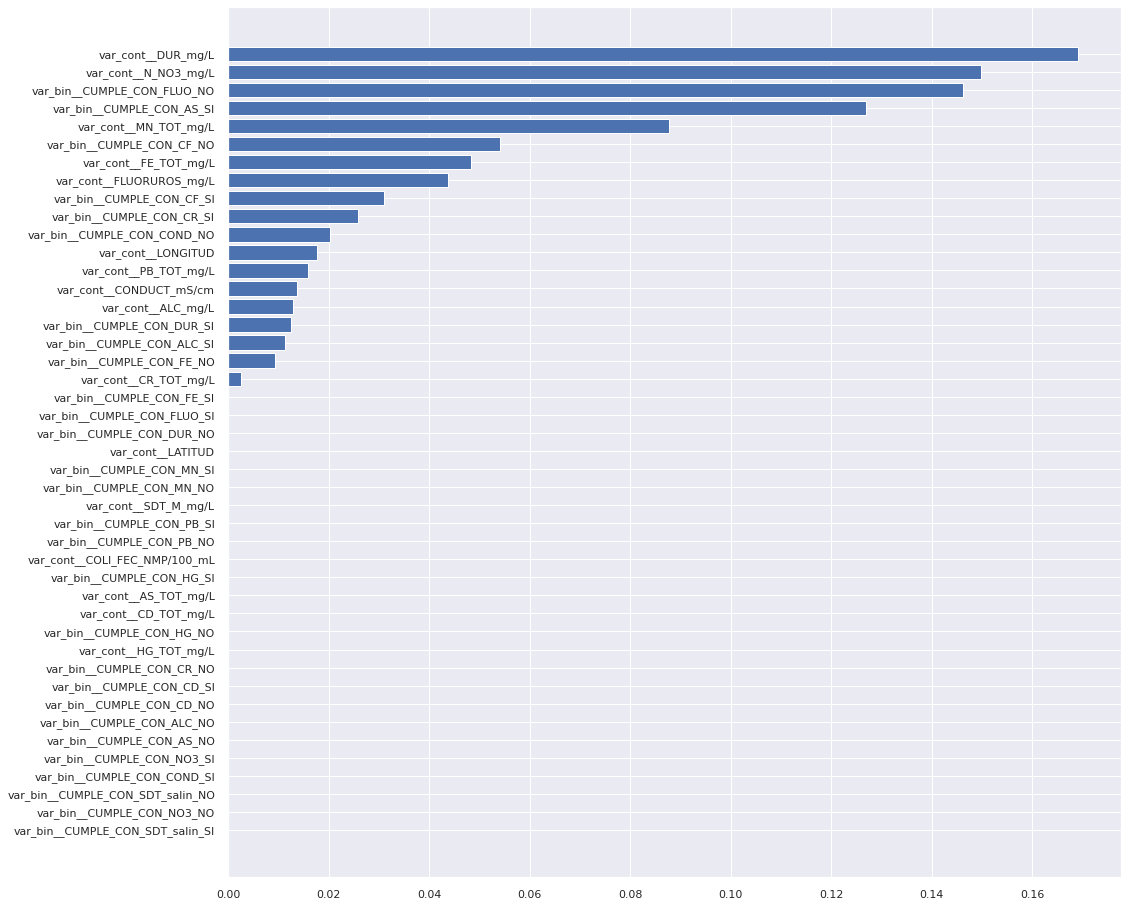

In [ ]:
# Graficamos las feature importances
sns.set(rc={'figure.figsize':(16,16)})
sorted_idx = pipe_d[1][1].feature_importances_.argsort()
plt.barh(pipe_d[:-1].get_feature_names_out()[sorted_idx], pipe_d[1][1].feature_importances_[sorted_idx])

### Selecciona las variables de mayor importancia.
Seleccionamos las variables que aportan información a nuestra variable dependiente SEMAFORO.

In [ ]:
# Realizamos particiones
importance_features = ['CUMPLE_CON_FLUO', 'FLUORUROS_mg/L', 'CONDUCT_mS/cm', 'CUMPLE_CON_COND',
                       'CUMPLE_CON_MN', 'MN_TOT_mg/L', 'N_NO3_mg/L', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS',
                       'AS_TOT_mg/L', 'DUR_mg/L', 'CUMPLE_CON_DUR', 'CUMPLE_CON_FE', 'FE_TOT_mg/L',
                       'ALC_mg/L', 'CUMPLE_CON_ALC',  'CUMPLE_CON_CR', 'CR_TOT_mg/L', 'LONGITUD', 'LATITUD']
X = df_sub_w[importance_features]

### Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split).

Hacemos una particion de entrenamiento del 80% y una particion de prueba del 20%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 42)

# Para las variables continuas
cont_pipe = Pipeline(steps=[('escalaNormal', StandardScaler())])
col_cont = ['FLUORUROS_mg/L', 'CONDUCT_mS/cm', 'MN_TOT_mg/L', 'N_NO3_mg/L', 
            'AS_TOT_mg/L', 'DUR_mg/L', 'FE_TOT_mg/L',
            'ALC_mg/L', 'CR_TOT_mg/L', 'LONGITUD', 'LATITUD']

# Para las variables categoricas binarias
cat_bin = Pipeline(steps= [('bin', OneHotEncoder())])
cat_bin_col = ['CUMPLE_CON_FLUO', 'CUMPLE_CON_COND',
              'CUMPLE_CON_MN', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS',
              'CUMPLE_CON_DUR', 'CUMPLE_CON_FE', 'CUMPLE_CON_ALC','CUMPLE_CON_CR']

transform_columns = ColumnTransformer(transformers=[
                                        ('var_cont', cont_pipe, col_cont),
                                        ('var_bin', cat_bin, cat_bin_col)])

### Explora que clasificador es el más optimo, ejemplo:

  * Decision trees
  * Random Forest.


In [ ]:
modelos = [RandomForestClassifier(random_state= 42), DecisionTreeClassifier(random_state= 42)]
nombres = ['Bosque Aleatorio', 'Árbol de Decisión']
pipes = []

for i in range(len(modelos)):
    pipes.append(Pipeline(steps=[('variables', transform_columns),
                            ('modelo', modelos[i])]))

    pipes[i].fit(X_train, y_train)
    print("--> Modelo "+ nombres[i] + " score:")
    print(pipes[i].score(X_test, y_test))
    print("\n")

--> Modelo Bosque Aleatorio score:
0.9345794392523364


--> Modelo Árbol de Decisión score:
0.8738317757009346




Para determinar cual es el clasificador más optimo nos basaremos en su score obtenido para el conjunto de Prueba. Entonces es Bosque Aleatorio con un score de 0.9345

### Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.



Para el reporte de clasificación usaremos el classification_report de sklearn y podremos observar precision y accuracy del modelo.

In [ ]:
target_names = le.classes_
y_pred = pipes[0].predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Amarillo       0.91      0.96      0.93        51
        Rojo       0.97      0.84      0.90        74
       Verde       0.93      1.00      0.96        89

    accuracy                           0.93       214
   macro avg       0.93      0.93      0.93       214
weighted avg       0.94      0.93      0.93       214



Y ahora graficaremos la curva Precision-Recall para nuestro RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/prcurve.py:257: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  YellowbrickWarning,


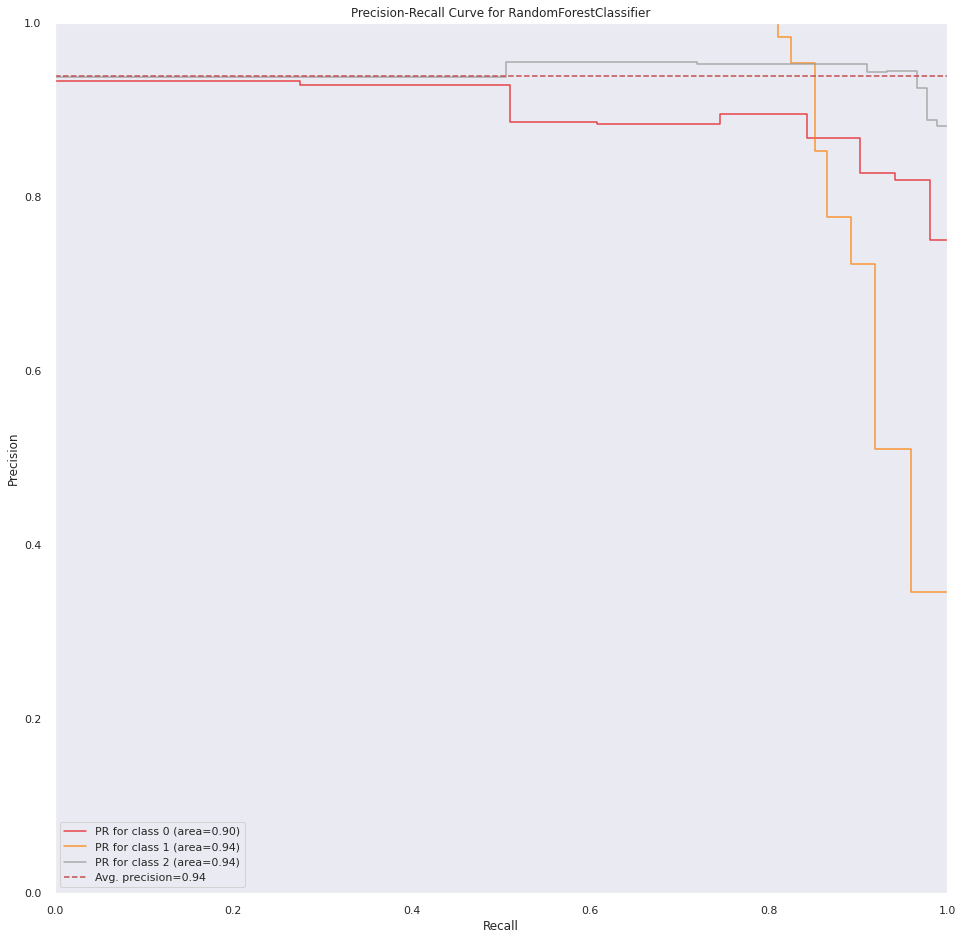

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
# Falta cambiar los nombres de las clases
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=10),
    per_class=True,
    cmap="Set1"
)
viz.fit(transform_columns.fit_transform(X_train), y_train)
viz.score(transform_columns.fit_transform(X_test), y_test)
viz.show()

Como podemos observar en la gráfica, tenemos una precision promedio de 0.95

### Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

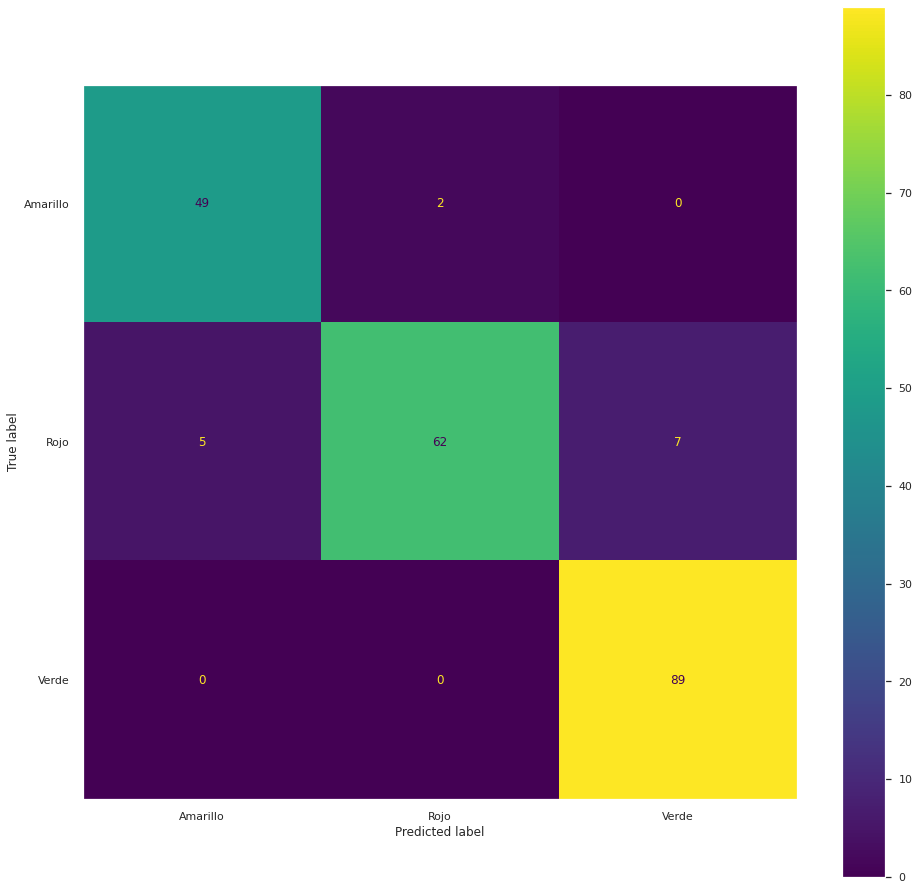

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=pipes[0][1].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=le.classes_)
disp.plot()
plt.grid(False)
plt.show()

De acuerdo con la Matriz de Confusión podemos corroborar que el número de Falsos Positivos y Falsos Negativos son muy pocos. Esto nos diría que el modelo está clasificando de manera acertada la mayoría de las veces tal cual lo indican las métricas.

Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.

La presentación se encuentra bajo la misma carpeta de la Entrega del Reto 2.

##Conclusiones



---


De ambas entregas se concluye: ​

* La limpieza de la base de datos fue directa, se pudo ahorrar muchos procedimientos debido a la eliminación de columnas redundantes. ​

* Mediante K-Means, se encontró si existe relación entre la calidad del agua y su ubicación. Se demostró con el mapa de la república mexicana que: ​

  * La zona Centro tiene mejor registro de agua de buena calidad, pero también existiría un riesgo alto de que en una zona existiera agua de mala calidad. ​

  * La zona Norte puede ser la zona con mejor calidad del agua, ya que encontramos abundancia de semáforo amarillo/verde y muy poca existencia de registros malos. ​

  * La zona Noroeste presenta el mismo comportamiento que la zona Centro. ​

  * La zona Sur es la zona con peor calidad del agua, encontrando una mayoría de registros en semáforo rojo. ​

* Con la base de datos limpia realizamos particiones de entrenamiento y prueba. El clasificador más óptimo resultó ser: ​

  * Modelo Bosque Aleatorio score: 0.9345794392523364

* Determinamos usar Bosque Aleatorio de este punto en Adelante y pudimos obtener los siguientes resultados:​

  * En la gráfica de Precision-Recall se observa una precisión de 0.95. Lo que indica que el clasificador es óptimo. ​

  * De acuerdo con la Matriz de Confusión, podemos corroborar que el número de Falsos Positivos y Falsos Negativos son muy pocos. Esto nos diría que el modelo está clasificando de manera acertada la mayoría de las veces tal cual lo indican las métricas, y, por lo tanto, las predicciones son más acertadas. ​

* Con este Reto final se abordó un proceso completo para la agrupación de datos no etiquetados (Aprendizaje no supervisado con Kmeans) y clasificación de datos etiquetados (Aprendizaje supervisado con Random Forest).​

* La ventaja de usar el clasificador Random Forest es que, por su naturaleza, tiende a evitar el sobreajuste y se convierte en un clasficador muy potente.